<a href="https://colab.research.google.com/github/raviyk/courses/blob/master/TF2_0_SimpleRNN_Sine_rk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

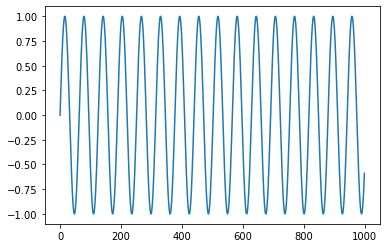

In [113]:
#create sine wave
series = np.sin(0.1*np.arange(1000)) #+ np.random.randn(1000)*0.1
#series = np.sin(0.1*np.arange(1000)) #+ np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [114]:
#Build the dataset
#N = -1
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  X_temp = series[t: t+T]
  Y_temp = series[t+T]
  X.append(X_temp)
  Y.append(Y_temp)
N = len(X)
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [146]:
#Build model
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
i = Input(shape=(T, 1))
o = SimpleRNN(15, activation='relu')(i)
o = Dense(1)(o)

model = Model(inputs = i, outputs = o)
model.compile(loss='mse', optimizer=Adam(lr=0.001))


r = model.fit(
              X[:-N//2], Y[:-N//2]
              , epochs=80
              , validation_data=(X[-N//2:], Y[-N//2:]),)

Epoch 1/80
16/16 [==============================] - 0s 13ms/step - loss: 0.2156 - val_loss: 0.1335
Epoch 2/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0900 - val_loss: 0.0531
Epoch 3/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0357 - val_loss: 0.0214
Epoch 4/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.0153
Epoch 5/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.0119
Epoch 6/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 7/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 8/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 9/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 10/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 11/80
16/16 

In [147]:
r.history.keys()

dict_keys(['loss', 'val_loss'])

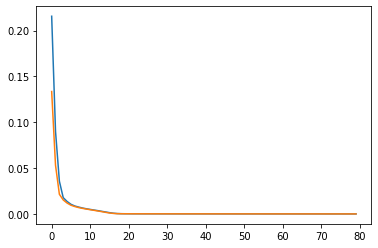

In [148]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

In [149]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

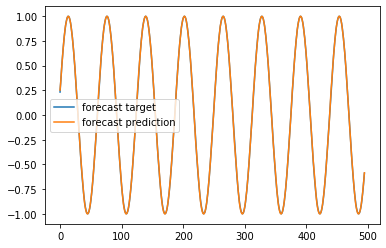

In [150]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [151]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

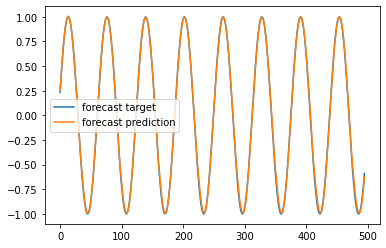

In [156]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [153]:
import numpy as np
array = np.arange(12).reshape(3, 4)
print("Original array : \n", array) 

Original array : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [154]:
array.shape

(3, 4)

In [155]:
print("Original array : \n", array) 

# Rolling array; Shifting one place 
print("\nRolling with 1 shift : \n", np.roll(array, 1)) 
  
# Rolling array; Shifting five places 
print("\nRolling with 5 shift : \n", np.roll(array, 5)) 
  
# Rolling array; Shifting five places with 0th axis 
print("\nRolling with 5 shift with 0 axis : \n", np.roll(array, 2, axis = 0)) 


Original array : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Rolling with 1 shift : 
 [[11  0  1  2]
 [ 3  4  5  6]
 [ 7  8  9 10]]

Rolling with 5 shift : 
 [[ 7  8  9 10]
 [11  0  1  2]
 [ 3  4  5  6]]

Rolling with 5 shift with 0 axis : 
 [[ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]]
